# Task 6.2 Exploring relationships

### This script contains the following:

#####    1. Set up a Jupyter notebook with visualization libraries, and import the cleaned data set
#####    2. Pick out variables from the dataset suitable for exploratory visual analysis
#####    3. Create a correlation matrix heatmap
#####    4. Create a scatterplot (or plots) for the variables with the strongest correlations
#####    5. Create a pair plot of the entire data set
#####    6. Create a categorical plot and interpret the results
#####    7. Revisit the questions you generated in the previous task and write answers to those you can
#####    8. Define any hypotheses that you can at this point

### 1. Set up a Jupyter notebook with visualization libraries, and import the cleaned data set

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [66]:
# Check matplotlib version
matplotlib.__version__

'3.7.2'

In [67]:
# Import data

df = pd.read_csv('2015-2019_Dystopia.csv')

In [68]:
# Verify import

df.head()

,Happiness Rank,Country,Region,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Perceptions of Corruption,Generosity,Dystopia_Residuals,Year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.517,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.702,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.492,2015
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.465,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.452,2015


### 2. Pick out variables from the dataset suitable for exploratory visual analysis

##### **The following variables are suitable for analysis**:

    Happiness Score   
    GDP per Capita   
    Social Support   
    Life Expectancy   
    Freedom   
    Perceptions of Corruption   
    Generosity
    
    Dystropia_Residuals is excluded because it represents an imaginary country and unknown characteristics 

### 3. Create a correlation matrix heatmap

In [72]:
# Create a dataframe with the variables suitable for analysis

df_selected = df[['Happiness Score','GDP per Capita','Social Support','Life Expectancy','Freedom','Perceptions of Corruption','Generosity']]

In [73]:
# Create a correlation matrix using pandas

df_corr = df_selected.corr()

In [74]:
# Verify the data in the dataframe

df_corr

,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Perceptions of Corruption,Generosity
Happiness Score,1.000000,0.793293,0.650922,0.746786,0.551634,0.401060,0.137565
GDP per Capita,0.793293,1.000000,0.583292,0.784423,0.348331,0.319410,-0.013072
Social Support,0.650922,0.583292,1.000000,0.572590,0.426295,0.130474,-0.036831
Life Expectancy,0.746786,0.784423,0.572590,1.000000,0.345715,0.257334,0.011321
Freedom,0.551634,0.348331,0.426295,0.345715,1.000000,0.458370,0.290845
Perceptions of Corruption,0.401060,0.319410,0.130474,0.257334,0.458370,1.000000,0.318030
Generosity,0.137565,-0.013072,-0.036831,0.011321,0.290845,0.318030,1.000000


In [75]:
# Limit all numerical values to 2 decimals

df_corr.round(2)

,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Perceptions of Corruption,Generosity
Happiness Score,1.00,0.79,0.65,0.75,0.55,0.40,0.14
GDP per Capita,0.79,1.00,0.58,0.78,0.35,0.32,-0.01
Social Support,0.65,0.58,1.00,0.57,0.43,0.13,-0.04
Life Expectancy,0.75,0.78,0.57,1.00,0.35,0.26,0.01
Freedom,0.55,0.35,0.43,0.35,1.00,0.46,0.29
Perceptions of Corruption,0.40,0.32,0.13,0.26,0.46,1.00,0.32
Generosity,0.14,-0.01,-0.04,0.01,0.29,0.32,1.00


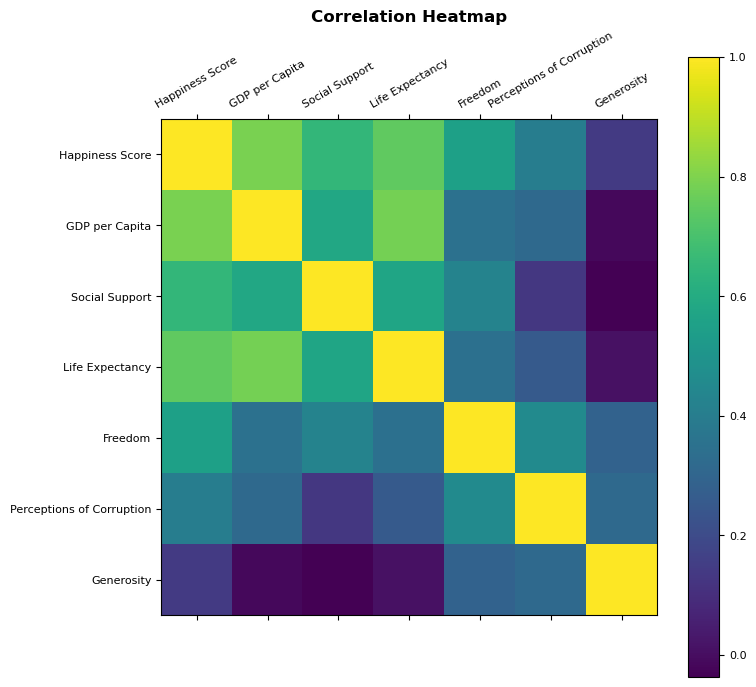

In [76]:
# Create a correlation matrix plat using matplotlib

# Setup plot
cmp = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_corr, fignum=cmp.number) # type of plot
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=8, rotation=30) # x axis labels
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=8) # y axis labels

# Setup layout
cb = plt.colorbar() # add a color legend
cb.ax.tick_params(labelsize=8) # add font size
plt.title('Correlation Heatmap', fontsize=12, fontweight='bold') # add plot title
plt.savefig("matplotlib_plot.png") # save the heatmap
plt.show() # display the heatmap

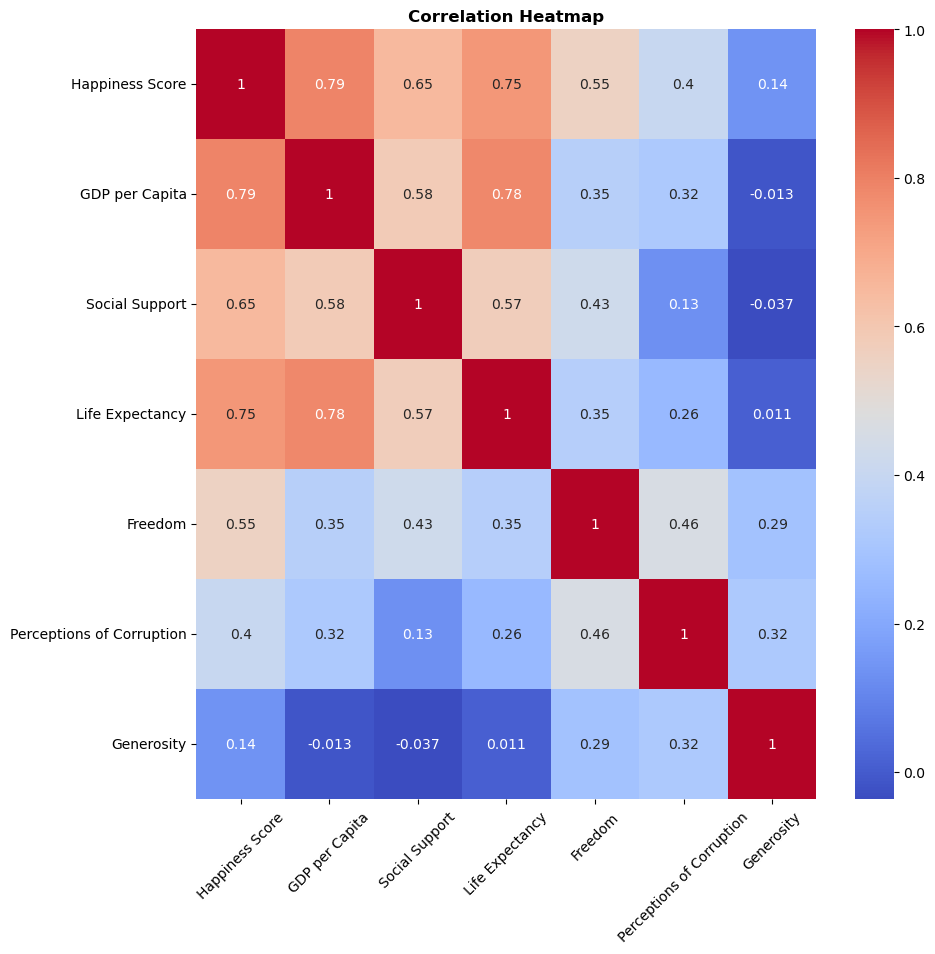

In [77]:
# Create a correlation heatmap using seaborn

f,ax = plt.subplots(figsize=(10,10)) # create a subplot with matplotlib
corr_heat = sns.heatmap(df_corr, annot = True, ax = ax, cmap="coolwarm") # create the heatmap
plt.xticks(rotation=45, fontsize=10)  # rotate x-axis labels and set font properties
plt.yticks(rotation=0, fontsize=10)  # set y-axis labels without rotation
plt.title("Correlation Heatmap", fontsize=12, fontweight='bold') # add title
plt.savefig("seaborn_plot.png") # save the heatmap
plt.show() # show the plot

##### **Comments:**

##### The correlation heatmap shows a strong positive relationship between the Happiness Score
##### and GDP per capita (0.79), Life Expectancy (0.75), and Social Support (0.65). 
##### There is a moderate positive relationship between the Happiness Score and Freedom to make 
##### life decisions, a moderate negative relationship with Perceptions of Corruption, and a 
##### weak negative relationship with Generosity.
##### In other words, the factors which impact the most the Happiness Score between 2015 and 2019 are: GDP per capita,
##### Life Expectancy, and Social Support, in this order.

### 4. Create a scatterplot (or plots) for the variables with the strongest correlations

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


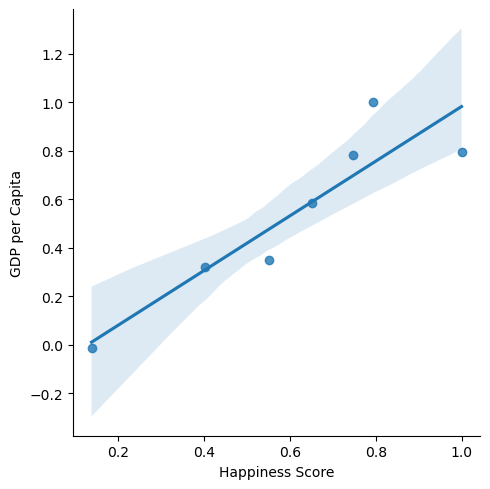

In [81]:
# Create a scatterplot for the Happiness Score and GDP per capita columns in seaborn

sns.lmplot(x = 'Happiness Score', y = 'GDP per Capita', data = df_corr)
plt.savefig("scatterplot_HS_GDP.jpg")  # save the scatterplot
plt.show() # show the scatterplot

##### **Comments:**

##### The trend line shows a strong linear positive relationship between GDP per Capita and the Happiness Score.
##### The data points are close to the trend line, showing that this is a good fit.
##### There is an upward trend all along, with the Happiness Score increasing with higher GDP per capita values.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


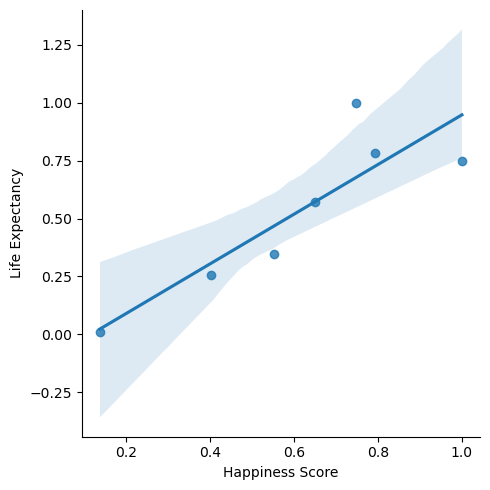

In [84]:
# Create a scatterplot for the Happiness Score and Life Expectancy columns in seaborn

sns.lmplot(x = 'Happiness Score', y = 'Life Expectancy', data = df_corr)
plt.savefig("scatterplot_HS_LE.jpg")  # save the scatterplot
plt.show() # show the scatterplot

##### **Comments:**

##### Similar with the GDP per capita variable, he trend line shows a strong linear positive relationship between Life Expectancy
##### and the Happiness Score.
##### Excluding the values of 1 for the Happiness Score and for Life Expectancy, the data points are very close to the trend line,
##### showing that this is a good fit.
##### There is an upward trend all along, with the Happiness Score increasing with higher Life Expectancy values.

### 5. Create a pair plot of the entire data set

In [88]:
# Create a dataframe with the variables of interest

df_pair_plot = df[['Happiness Score','GDP per Capita','Social Support','Life Expectancy']] # create the dataframe
df_pair_plot.round(2) # round the numbers to 2 decimals
df_pair_plot.head()

,Happiness Score,GDP per Capita,Social Support,Life Expectancy
0,7.587,1.39651,1.34951,0.94143
1,7.561,1.30232,1.40223,0.94784
2,7.527,1.32548,1.36058,0.87464
3,7.522,1.45900,1.33095,0.88521
4,7.427,1.32629,1.32261,0.90563


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


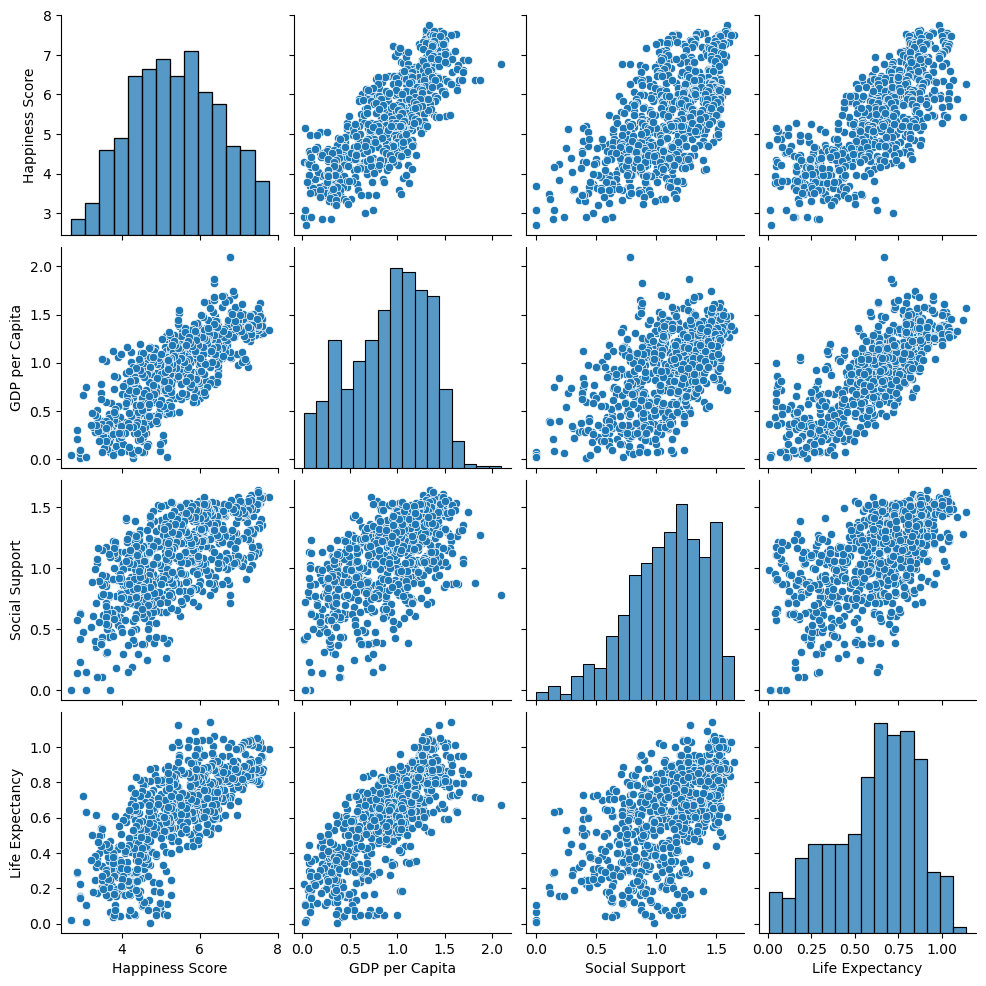

In [89]:
# Create the pair plot

g = sns.pairplot(df_pair_plot)
plt.savefig("pairplot.jpg")  # save the pair plot
plt.show() # show the pair plot

##### **Comments:**

##### The relationship between the Happiness Score variable and the variables GDP per Capita, Social Support,
##### and Life Expectancy is very similar, as these relationships are closely aligned with one another.
##### There is a linear interdependence between the variables mentioned before, which means that GDP per Capita,
##### Social Support, and Life Expectancy could be good predictors for further analysis.

### 6. Create a categorical plot and interpret the results

<Axes: xlabel='Happiness Score', ylabel='Count'>

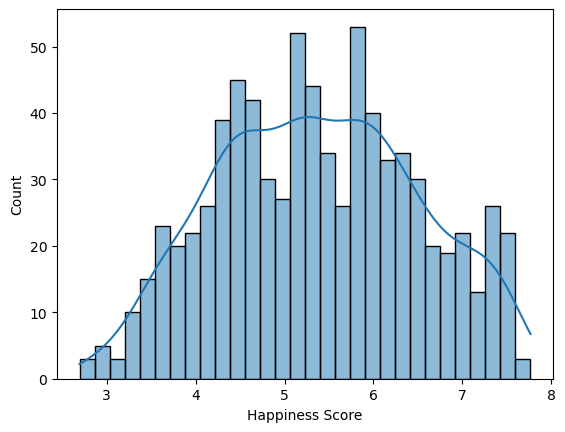

In [93]:
# Visualize the distribution of the variables for the Happiness Score

sns.histplot(df['Happiness Score'], bins = 30, kde = True)

In [94]:
# Set up categories

df.loc[df['Happiness Score'] < 3, 'Happiness Category'] = 'Extremely Unhappy'

In [95]:
df.loc[(df['Happiness Score'] >= 3) & (df['Happiness Score'] < 4), 'Happiness Category'] = 'Unhappy'

In [96]:
df.loc[(df['Happiness Score'] >= 4) & (df['Happiness Score'] < 6), 'Happiness Category'] = 'Moderately Happy'

In [97]:
df.loc[(df['Happiness Score'] >= 6) & (df['Happiness Score'] < 7.5), 'Happiness Category'] = 'Happy'

In [98]:
df.loc[df['Happiness Score'] >= 7.5, 'Happiness Category'] = 'Unbelievably Happy'

In [99]:
df.head()

,Happiness Rank,Country,Region,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Perceptions of Corruption,Generosity,Dystopia_Residuals,Year,Happiness Category
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.517,2015,Unbelievably Happy
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.702,2015,Unbelievably Happy
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.492,2015,Unbelievably Happy
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.465,2015,Unbelievably Happy
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.452,2015,Happy


In [100]:
df['Happiness Category'].value_counts(dropna = False)

Happiness Category
Moderately Happy      450
Happy                 219
Unhappy                89
Unbelievably Happy     16
Extremely Unhappy       7
Name: count, dtype: int64

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


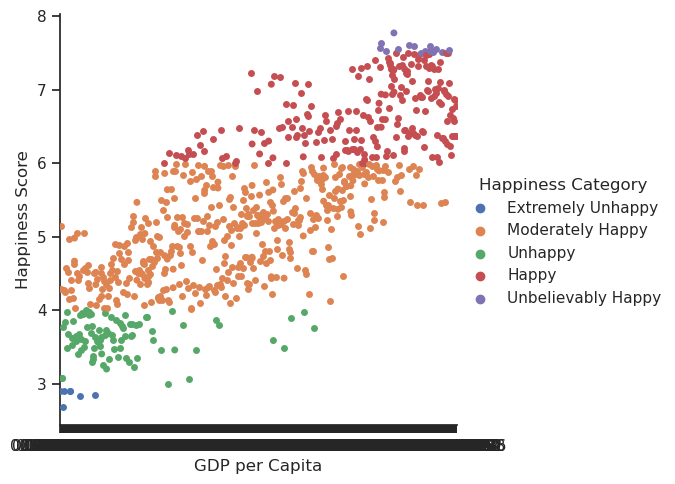

In [123]:
# Create a categorical plot in seaborn using the happiness categories created above

sns.set(style="ticks")
g = sns.catplot(data=df, x="GDP per Capita", y="Happiness Score", hue="Happiness Category")

# g.set_xticklabels(g.get_xticklabels(), rotation=0, ha='right') #  Set the x-axis tick labels

plt.savefig("categorical_plot.jpg")  # save the categorical plot
plt.show() # show the categorical plot


#### Comments:

##### As mentioned before, it seems that overall, there is a linear interdependence between the Happiness Score
##### and GDP per Capita: the higher the GDP per capita, the happier the countries. GDP per capita is one of 
##### the key factors correlated with happiness. Wealthier countries tend to have higher Happiness Scores
##### because GDP per capita often reflects access to resources, better healthcare, education, and infrastructure.
##### Other factors like social support and life satisfaction also play a critical role in determining happiness.

### 7. Revisit the questions you generated in the previous task and write answers to those you can

##### 1. **What factors have the most impact on the happiness score?**
##### **Answer:** GDP per Capita, Social Support, and Life Expectancy.
#####
##### 2. **How does GDP per capita influence happiness scores?**
##### **Answer:**  Overall, there is a linear interdependence between the Happiness Score and GDP per Capita: the higher the GDP per capita, 
##### the happier the countries. GDP per capita is one of  the key factors correlated with happiness. Wealthier countries tend to have higher 
##### Happiness Scores because GDP per capita often reflects access to resources, better healthcare, education, and infrastructure. 
##### Other factors like social support and life satisfaction also play a critical role in determining happiness.
#####
##### 3. **What is the relationship between perceived social support and happiness?**
##### **Answer:** There is a strong positive correlation between social support and happiness. Countries where people report having someone they can 
##### rely on in times of need tend to have higher Happiness Scores.
##### Social support reduces feelings of loneliness and stress, enhances resilience, and improves mental health all of which are
##### closely linked to higher happiness levels.
#####  Perceived social support is one of the most significant predictors of happiness and overall life satisfaction.
#####
##### 4. **How does life expectancy correlate with happiness scores?**
##### **Answer:** Life expectancy is positively correlated with happiness scores. Countries with higher life expectancy
##### tend to have higher happiness scores, as longer, healthier lives contribute to overall well-being and life satisfaction.
##### Higher life expectancy often reflects better healthcare, nutrition, and living conditions. These factors contribute to
##### physical and mental health, which are critical to happiness.

### 8. Define any hypotheses that you can at this point

##### 1. Countries with higher GDP per Capita tend to have significantly higher Happiness Scores, indicating a positive 
##### correlation between economic prosperity and happiness.
#####
##### 2. Countries with higher Social Support values tend to have significantly higher Happiness Scores, indicating a positive correlation
##### between social support and happiness.
#####
##### 3. Countries with higher Life Expectancy values tend to have significantly higher Happiness Scores, indicating a positive 
##### correlation between life expectancy and happiness.